In [1]:
# Add parent directory to path for imports
import sys
from pathlib import Path
sys.path.insert(0, str(Path().resolve().parent))

In [2]:
from agricultural_csp.instance import *
from agricultural_csp.evaluator import *

import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Display Function Definition and Usage

In [3]:
from agricultural_csp.tools import display_grid_and_path

In [4]:
# Create a circular grid with five small square obstacles scattered on the circle
center_r, center_c = 100, 100
outer_radius = 80
obstacle_half_size = 5  # Half-size of each small square obstacle

r_grid, c_grid = np.mgrid[0:200, 0:200]
dist_from_center = np.sqrt((r_grid - center_r)**2 + (c_grid - center_c)**2)
grid_nodes = np.argwhere(dist_from_center <= outer_radius)

# Create five small square obstacles at different positions on the circle
obstacle_positions = [
    (100, 140),  # Right
    (130, 115),  # Bottom-right
    (115, 70),   # Top-right
    (70, 85),    # Top-left
    (85, 130)    # Bottom-left
]

obstacle_list = []
for obs_r, obs_c in obstacle_positions:
    obstacle = np.argwhere(
        (np.abs(r_grid - obs_r) <= obstacle_half_size) & 
        (np.abs(c_grid - obs_c) <= obstacle_half_size)
    )
    obstacle_list.append(obstacle)

obstacle_nodes = np.vstack(obstacle_list)

circular_inst = AgcspInstance(grid_nodes, obstacle_nodes, 15, 90)
circular_evaluator = AgcspEvaluator(circular_inst)

Grid Adaptativo: Densidade original (20081)
Grid Adaptativo: Nova densidade (reduzida) (7365 nós)


Coverage: 931/19448 nodes (4.8%)
Obstacles: 0/633 covered


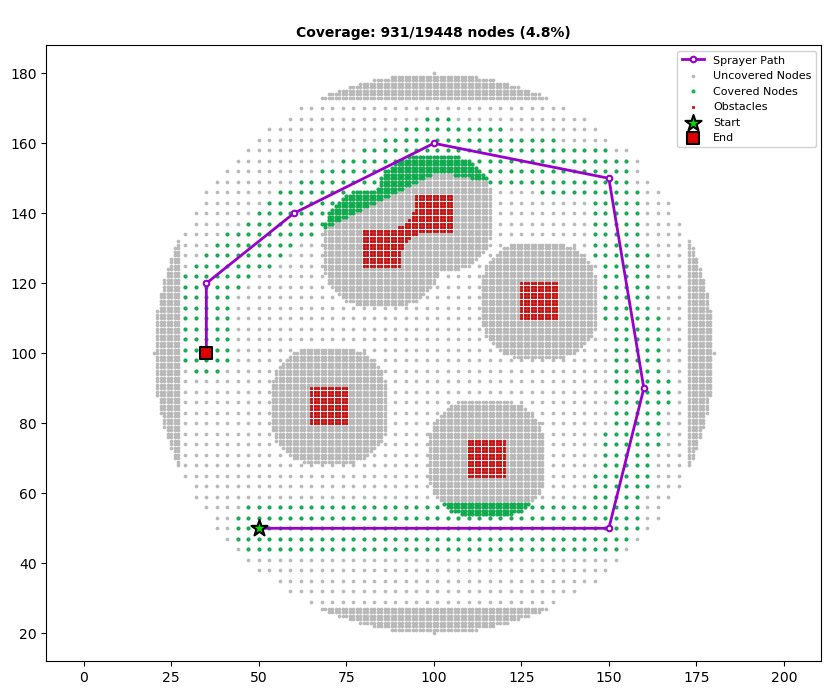

In [5]:
path=[(50, 50), (150, 50), (160, 90), (150, 150), (100, 160), (60, 140), (35, 120), (35, 100)]
display_grid_and_path(circular_inst, circular_evaluator, path)

# Evaluator and Cache testing

In [6]:
sol = AgcspSolution(path)
display(circular_evaluator.coverage_proportion(sol))
display(sol.cache['hits_obstacle'])
circular_evaluator.manouver_complexity_penalty(sol)

0.047871246400658166

False

2.0938904055817336

In [7]:
circular_evaluator.objfun(sol)

7364.308018096981

# Testing neighborhood step evaluations

### a) Node Removal Step

In [8]:
print("--- Teste do Movimento de Removal ---")

initial_sol_removal = AgcspSolution(path)
initial_cost_removal = circular_evaluator.objfun(initial_sol_removal)
print(f"Custo Inicial: {initial_cost_removal:.4f}")

node_idx_to_remove = 6
print(f"Ação: Remover o nó na posição {node_idx_to_remove}")

calculated_delta_removal = circular_evaluator.evaluate_removal_delta(initial_sol_removal, node_idx_to_remove)
print(f"Delta Calculado pelo método: {calculated_delta_removal:.4f}")

new_path_removal = np.delete(np.array(initial_sol_removal.path), node_idx_to_remove, axis=0)
new_sol_removal = AgcspSolution(new_path_removal)
new_cost_removal = circular_evaluator.objfun(new_sol_removal)
expected_delta_removal = new_cost_removal - initial_cost_removal

print(f"Custo da Nova Solução (recalculado): {new_cost_removal:.4f}")
print(f"Delta Esperado (new_cost - old_cost): {expected_delta_removal:.4f}")

if np.isclose(calculated_delta_removal, expected_delta_removal):
    print("\nO método 'evaluate_removal_delta' está correto.")
else:
    print("\nO delta calculado é diferente do esperado.")

--- Teste do Movimento de Removal ---
Custo Inicial: 7364.3080
Ação: Remover o nó na posição 6
Delta Calculado pelo método: -2.8243
Custo da Nova Solução (recalculado): 7361.4837
Delta Esperado (new_cost - old_cost): -2.8243

O método 'evaluate_removal_delta' está correto.


In [9]:
removal_delta_components = circular_evaluator.evaluate_removal_delta(initial_sol_removal, node_idx_to_remove, return_components=True)
print(removal_delta_components)

(2.2722130810366115, -4.8457155268812215, -0.25078437202012516)


Coverage: 931/19448 nodes (4.8%)
Obstacles: 0/633 covered


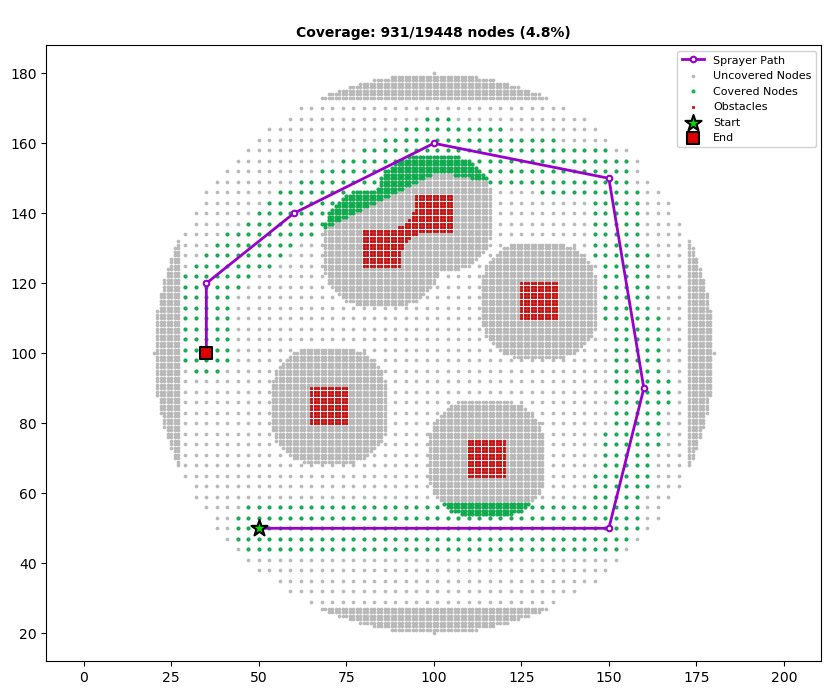

In [10]:
display_grid_and_path(circular_inst, circular_evaluator, path)

Coverage: 925/19448 nodes (4.8%)
Obstacles: 0/633 covered


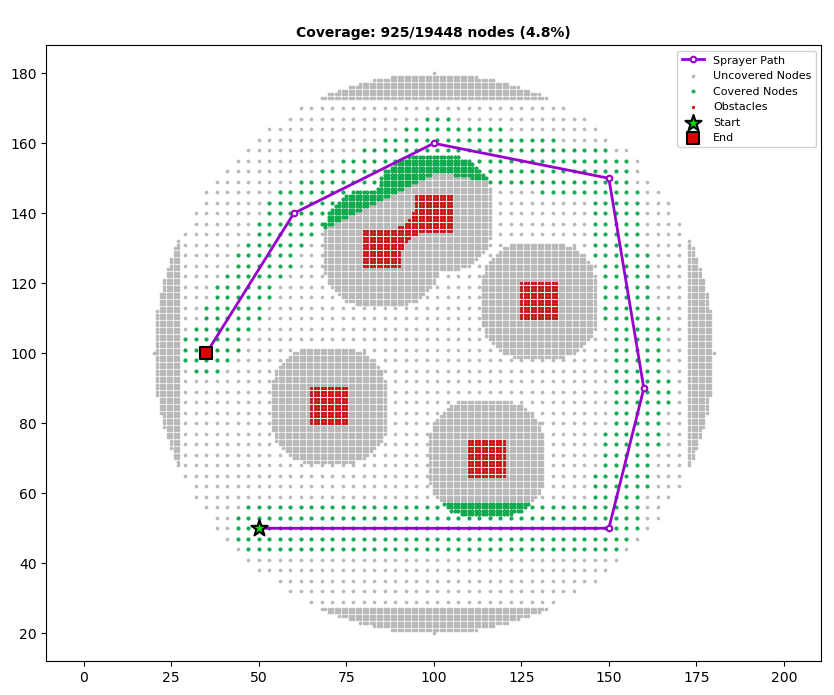

In [11]:
display_grid_and_path(circular_inst, circular_evaluator, new_path_removal)

### b) Insertion Method

In [12]:
print("\n--- Teste do Movimento de Insertion ---")

initial_sol_insertion = AgcspSolution(path)
initial_cost_insertion = circular_evaluator.objfun(initial_sol_insertion)
print(f"Custo Inicial: {initial_cost_insertion:.4f}")

node_to_insert = (160, 60)  # New node to insert
insert_position = 2  # Position to insert the new node
print(f"Ação: Inserir o nó {node_to_insert} na posição {insert_position}")

calculated_delta_insertion = circular_evaluator.evaluate_insertion_delta(initial_sol_insertion, node_to_insert, insert_position)
print(f"Delta Calculado pelo método: {calculated_delta_insertion:.4f}")

new_path_insertion = np.insert(np.array(initial_sol_insertion.path), insert_position, node_to_insert, axis=0)
new_sol_insertion = AgcspSolution(new_path_insertion)
new_cost_insertion = circular_evaluator.objfun(new_sol_insertion)
expected_delta_insertion = new_cost_insertion - initial_cost_insertion

print(f"Custo da Nova Solução (recalculado): {new_cost_insertion:.4f}")
print(f"Delta Esperado (new_cost - old_cost): {expected_delta_insertion:.4f}")

if np.isclose(calculated_delta_insertion, expected_delta_insertion):
    print("\nO método 'evaluate_insertion_delta' está correto.")
else:
    print("\nO delta calculado é diferente do esperado.")


--- Teste do Movimento de Insertion ---
Custo Inicial: 7364.3080
Ação: Inserir o nó (160, 60) na posição 2
Delta Calculado pelo método: 2.6701
Custo da Nova Solução (recalculado): 7366.9781
Delta Esperado (new_cost - old_cost): 2.6701

O método 'evaluate_insertion_delta' está correto.


In [13]:
insertion_delta_components = circular_evaluator.evaluate_insertion_delta(initial_sol_insertion, node_to_insert, insert_position, return_components=True)
print(insertion_delta_components)

(-0.0, 2.9110793675543434, -0.24100180491567058)


Coverage: 931/19448 nodes (4.8%)
Obstacles: 0/633 covered


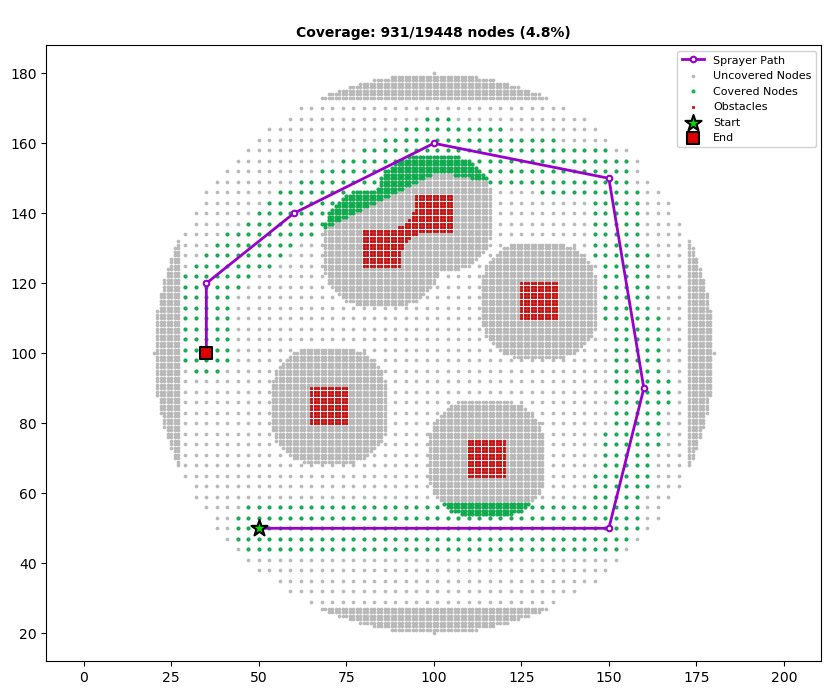

In [14]:
display_grid_and_path(circular_inst, circular_evaluator, path)

Coverage: 931/19448 nodes (4.8%)
Obstacles: 0/633 covered


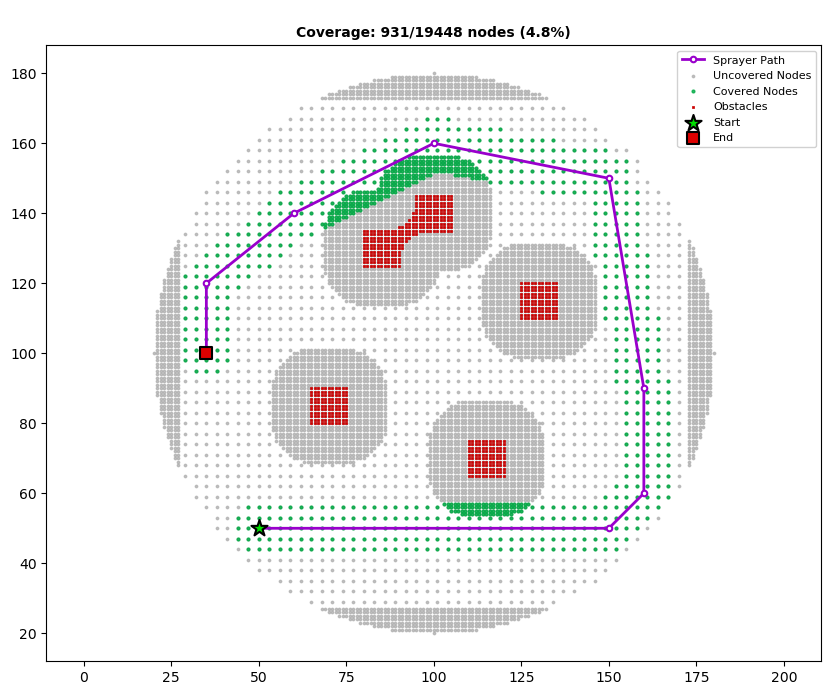

In [15]:
display_grid_and_path(circular_inst, circular_evaluator, new_path_insertion)

### c) Node swap step

In [16]:
print("\n--- Teste do Movimento de Swap ---")

initial_sol_swap = AgcspSolution(path)
initial_cost_swap = circular_evaluator.objfun(initial_sol_swap)
print(f"Custo Inicial: {initial_cost_swap:.4f}")

idx1, idx2 = 1, 3
print(f"Ação: Trocar os nós nas posições {idx1} e {idx2}")

calculated_delta_swap = circular_evaluator.evaluate_swap_delta(initial_sol_swap, idx1, idx2)
print(f"Delta Calculado pelo método: {calculated_delta_swap:.4f}")

new_path_swap = np.array(initial_sol_swap.path).copy()
new_path_swap[idx1], new_path_swap[idx2] = new_path_swap[idx2].copy(), new_path_swap[idx1].copy()
new_sol_swap = AgcspSolution(new_path_swap)
new_cost_swap = circular_evaluator.objfun(new_sol_swap)
expected_delta_swap = new_cost_swap - initial_cost_swap

print(f"Custo da Nova Solução (recalculado): {new_cost_swap:.4f}")
print(f"Delta Esperado (new_cost - old_cost): {expected_delta_swap:.4f}")

if np.isclose(calculated_delta_swap, expected_delta_swap):
    print("\nO método 'evaluate_swap_delta' está correto.")
else:
    print("\nO delta calculado é diferente do esperado.")


--- Teste do Movimento de Swap ---
Custo Inicial: 7364.3080
Ação: Trocar os nós nas posições 1 e 3
Delta Calculado pelo método: inf
Custo da Nova Solução (recalculado): 7016.3406
Delta Esperado (new_cost - old_cost): -347.9674

O delta calculado é diferente do esperado.


Coverage: 931/19448 nodes (4.8%)
Obstacles: 0/633 covered


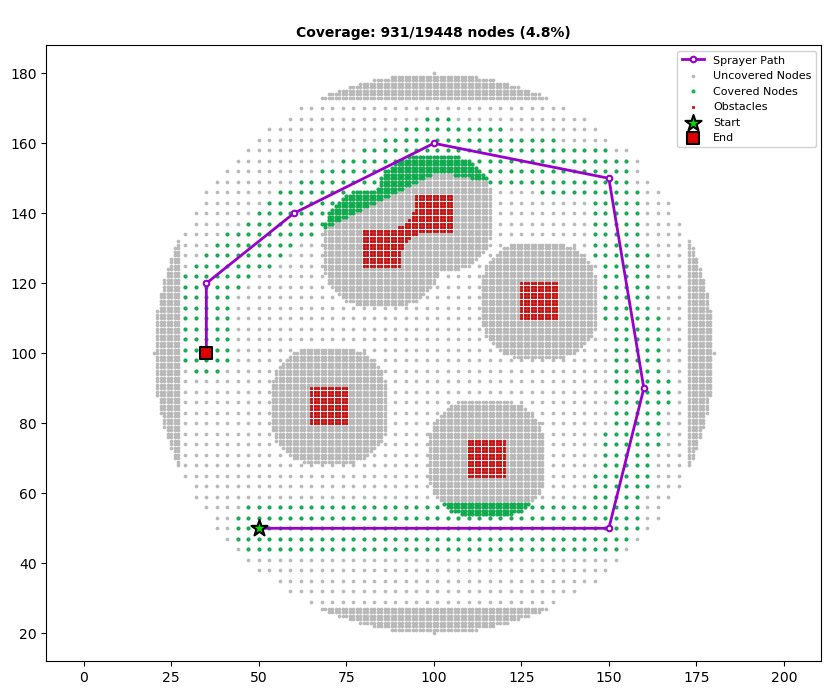

In [17]:
display_grid_and_path(circular_inst, circular_evaluator, path)

Coverage: 2022/19448 nodes (10.4%)
Obstacles: 0/633 covered


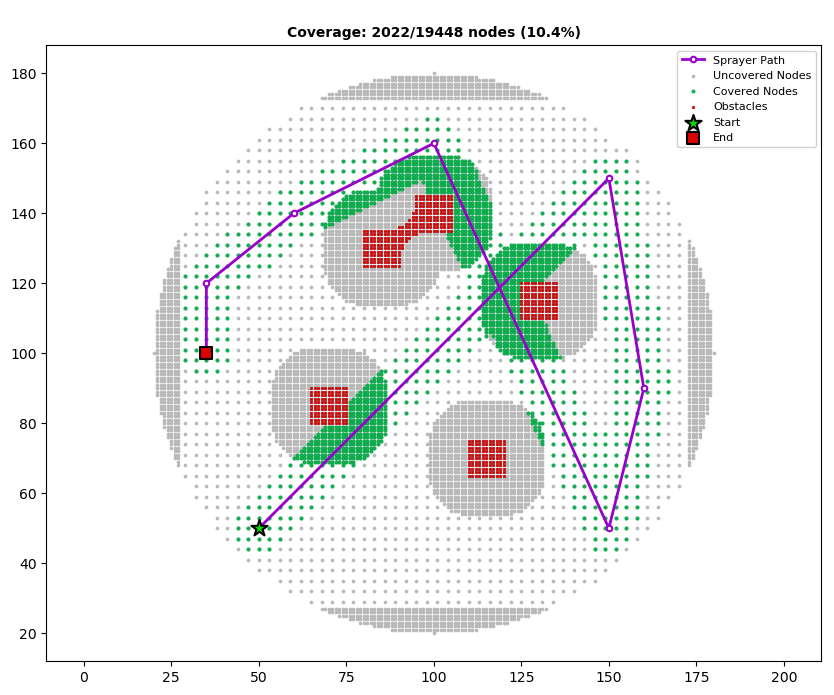

In [18]:
display_grid_and_path(circular_inst, circular_evaluator, new_path_swap)

### d) Node move step

In [19]:
print("\n--- Teste do Movimento de Move ---")

initial_sol_move = AgcspSolution(path)
initial_cost_move = circular_evaluator.objfun(initial_sol_move)
print(f"Custo Inicial: {initial_cost_move:.4f}")

node_idx_to_move = 0
min_distance = 10
direction = 'up'
print(f"Ação: Mover o nó na posição {node_idx_to_move} para a direção '{direction}' com distância mínima {min_distance}")

calculated_delta_move = circular_evaluator.evaluate_move_delta(initial_sol_move, node_idx_to_move, min_distance, direction)

if calculated_delta_move is None:
    print("Nenhum nó válido encontrado na direção especificada.")
elif calculated_delta_move == float('inf'):
    print("O movimento resultaria em uma solução inválida (colisão com obstáculo ou ângulo de virada inválido).")
else:
    print(f"Delta Calculado pelo método: {calculated_delta_move:.4f}")
    
    # Find the new node to verify
    new_node = circular_evaluator._find_node_in_direction(
        np.array(initial_sol_move.path[node_idx_to_move]), min_distance, direction
    )
    print(f"Nó original: {initial_sol_move.path[node_idx_to_move]}, Novo nó: {tuple(new_node)}")
    
    # Create the new path manually
    new_path_move = np.array(initial_sol_move.path).copy()
    new_path_move[node_idx_to_move] = new_node
    new_sol_move = AgcspSolution(new_path_move)
    new_cost_move = circular_evaluator.objfun(new_sol_move)
    expected_delta_move = new_cost_move - initial_cost_move
    
    print(f"Custo da Nova Solução (recalculado): {new_cost_move:.4f}")
    print(f"Delta Esperado (new_cost - old_cost): {expected_delta_move:.4f}")
    
    if np.isclose(calculated_delta_move, expected_delta_move):
        print("\nO método 'evaluate_move_delta' está correto.")
    else:
        print("\nO delta calculado é diferente do esperado.")


--- Teste do Movimento de Move ---
Custo Inicial: 7364.3080
Ação: Mover o nó na posição 0 para a direção 'up' com distância mínima 10
Delta Calculado pelo método: -3.3195
Nó original: [50. 50.], Novo nó: (59, 50)
Custo da Nova Solução (recalculado): 7360.9886
Delta Esperado (new_cost - old_cost): -3.3195

O método 'evaluate_move_delta' está correto.


In [20]:
move_delta_components = circular_evaluator.evaluate_move_delta(initial_sol_move, node_idx_to_move, min_distance, direction, return_components=True)
print(move_delta_components)

(5.680532702591529, -9.0, 0.0)


Coverage: 931/19448 nodes (4.8%)
Obstacles: 0/633 covered


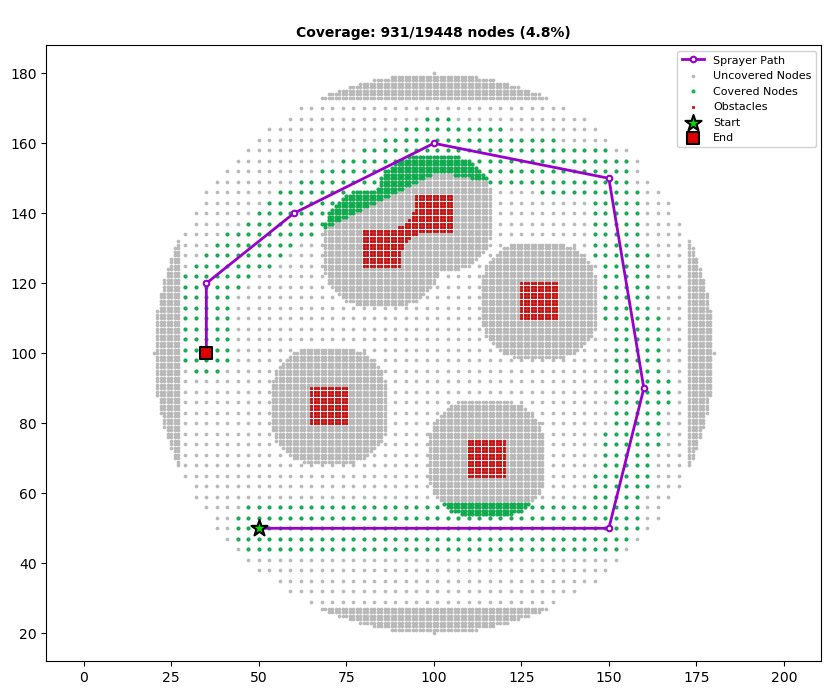

In [21]:
display_grid_and_path(circular_inst, circular_evaluator, path)

Coverage: 916/19448 nodes (4.7%)
Obstacles: 0/633 covered


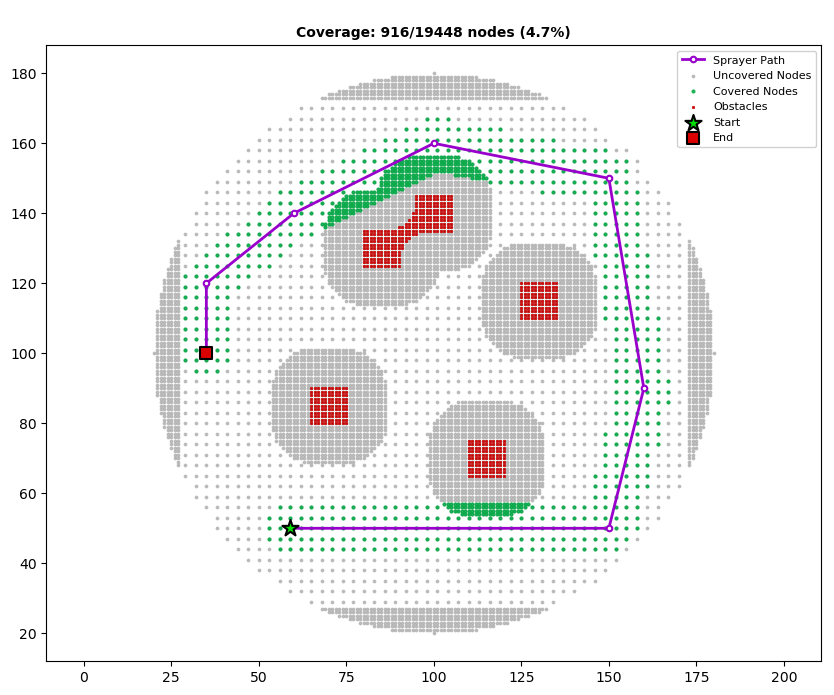

In [22]:
if calculated_delta_move is not None and calculated_delta_move != float('inf'):
    display_grid_and_path(circular_inst, circular_evaluator, new_path_move)

# Testing Construction Heuristic

In [23]:
from agricultural_csp.solver.agcsp_ts import *

In [24]:
ts = AgcspTS(circular_inst)

In [25]:
circular_inst.field_nodes

array([[113,  26],
       [ 44, 155],
       [118, 104],
       ...,
       [138,  83],
       [102, 160],
       [ 41, 150]])

In [26]:
gen_sol = ts._constructive_heuristic(ConstructiveHeuristicType.BOUSTROPHEDON_SEGMENTED)

  Iniciando em (68, 27)


Coverage: 3922/19448 nodes (20.2%)
Obstacles: 0/633 covered


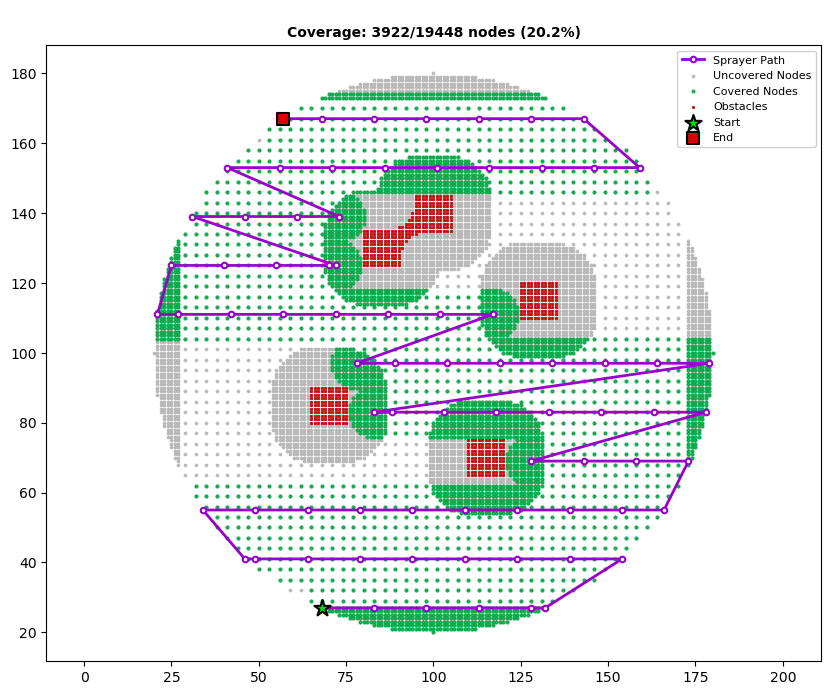

In [27]:
display_grid_and_path(circular_inst, circular_evaluator, gen_sol.path)

In [28]:
gen_sol = ts._constructive_heuristic(ConstructiveHeuristicType.RANDOM)

No valid uncovered nodes found. Trying covered nodes near uncovered areas...
Added covered node near uncovered area: (56, 35)
Added covered node near uncovered area: (56, 35)
No valid uncovered nodes found. Trying covered nodes near uncovered areas...
No valid uncovered nodes found. Trying covered nodes near uncovered areas...
Could not find any valid node to add from 1659 candidates.
Could not find any valid node to add from 1659 candidates.


Coverage: 5706/19448 nodes (29.3%)
Obstacles: 0/633 covered


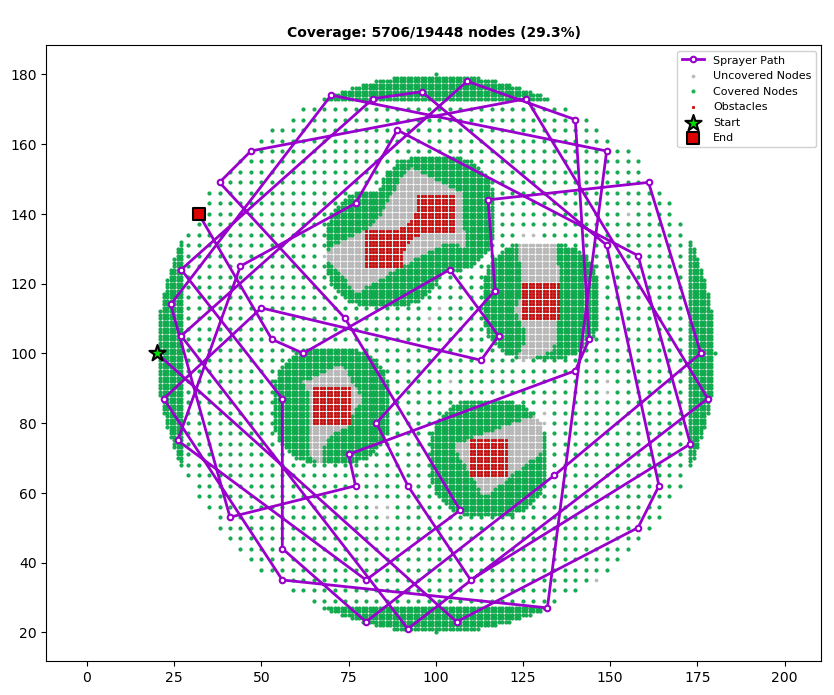

In [29]:
display_grid_and_path(circular_inst, circular_evaluator, gen_sol.path)

In [30]:
gen_sol = ts._constructive_heuristic(ConstructiveHeuristicType.FSM_COVERAGE_PLANNER)

  Visitou (20, 100), cobriu 81 novos nós. 17240 restantes.
Heurística 'Set Cover': Iniciando. 17240 alvos restantes.
  Visitou (23, 93), cobriu 82 novos nós. 17158 restantes.
  Visitou (23, 93), cobriu 82 novos nós. 17158 restantes.
  Visitou (31, 93), cobriu 114 novos nós. 17044 restantes.
  Visitou (31, 93), cobriu 114 novos nós. 17044 restantes.
  Visitou (39, 93), cobriu 114 novos nós. 16930 restantes.
  Visitou (39, 93), cobriu 114 novos nós. 16930 restantes.
  Visitou (47, 93), cobriu 114 novos nós. 16816 restantes.
  Visitou (47, 93), cobriu 114 novos nós. 16816 restantes.
  Visitou (55, 93), cobriu 79 novos nós. 16737 restantes.
  Visitou (55, 93), cobriu 79 novos nós. 16737 restantes.
  Visitou (62, 97), cobriu 69 novos nós. 16668 restantes.
  Visitou (70, 98), cobriu 65 novos nós. 16603 restantes.
  Visitou (62, 97), cobriu 69 novos nós. 16668 restantes.
  Visitou (70, 98), cobriu 65 novos nós. 16603 restantes.
  Visitou (78, 98), cobriu 84 novos nós. 16519 restantes.
  Visit

KeyboardInterrupt: 

Coverage: 6566/19448 nodes (33.8%)
Obstacles: 0/633 covered


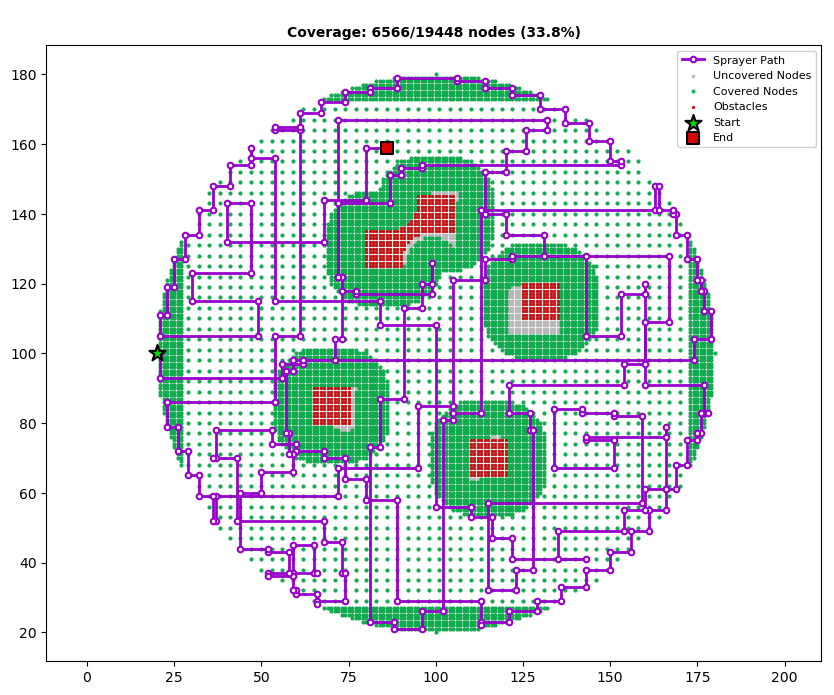

In [ ]:
display_grid_and_path(circular_inst, circular_evaluator, gen_sol.path)